In [ ]:
!pip install pyarrow==10.0.1

In [ ]:
!pip install "snowflake-connector-python[pandas]"

In [1]:
from snowflake.connector import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

/home/jupyterhub-admin/.local/lib/python3.9/site-packages/snowflake/connector/options.py:107: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.1), please install a version that adheres to: 'pyarrow<10.1.0,>=10.0.1; extra == "pandas"'
  warn_incompatible_dep(


In [2]:
%store -r url account user password database schema warehouse

In [3]:
conn = connect(
    url = url,
    account = "cda03513",
    user=user,
    password=password,
    database=database,
    schema=schema,
    warehouse=warehouse,
    autocommit=True
)

In [4]:
#Create your query command

query = "SELECT * FROM student_marks"

In [5]:
#Create the cursor object with your SQL command

cursor = conn.cursor()
cursor.execute(query)

In [6]:
#Convert output to a dataframe

df = cursor.fetch_pandas_all()
cursor.close()

True

In [7]:
df.head()

,NAME,MATHS,SCIENCE,ENGLISH
0,John,85.0,70.0,90
1,Emily,95.0,85.0,92
2,Michael,78.0,80.0,85
3,Samantha,90.0,88.0,91
4,Daniel,82.0,90.0,88


In [8]:
df.columns

Index(['NAME', 'MATHS', 'SCIENCE', 'ENGLISH'], dtype='object')

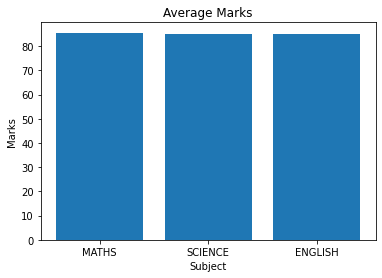

In [9]:
avg_marks = df.iloc[:, 1:].mean()
plt.bar(avg_marks.index, avg_marks.values)
plt.title('Average Marks')
plt.xlabel('Subject')
plt.ylabel('Marks')
plt.show()

In [10]:
print('Summary Statistics:')
print(df.describe())

Summary Statistics:
           MATHS    SCIENCE    ENGLISH
count  81.000000  81.000000  83.000000
mean   85.518519  84.888889  85.180723
std     5.320036   6.160357   9.390115
min    75.000000  70.000000  12.000000
25%    80.000000  80.000000  84.000000
50%    87.000000  88.000000  88.000000
75%    90.000000  90.000000  88.000000
max    95.000000  92.000000  92.000000


In [11]:
# Compute descriptive statistics
stats = df.describe()
print('Descriptive Statistics:')
print(stats)

Descriptive Statistics:
           MATHS    SCIENCE    ENGLISH
count  81.000000  81.000000  83.000000
mean   85.518519  84.888889  85.180723
std     5.320036   6.160357   9.390115
min    75.000000  70.000000  12.000000
25%    80.000000  80.000000  84.000000
50%    87.000000  88.000000  88.000000
75%    90.000000  90.000000  88.000000
max    95.000000  92.000000  92.000000


In [12]:
# Compute data completeness
null_counts = df.isnull().sum()
null_percentages = null_counts / len(df) * 100
print('Data Completeness:')
print(null_percentages)

Data Completeness:
NAME       0.000000
MATHS      2.409639
SCIENCE    2.409639
ENGLISH    0.000000
dtype: float64


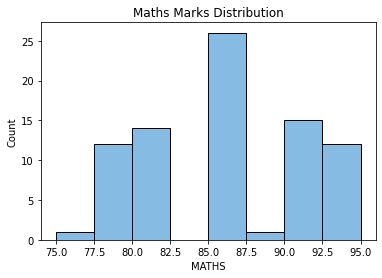

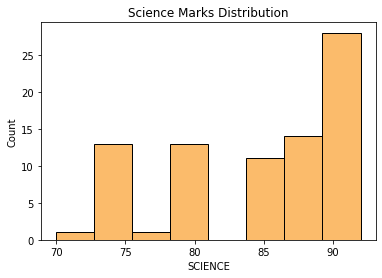

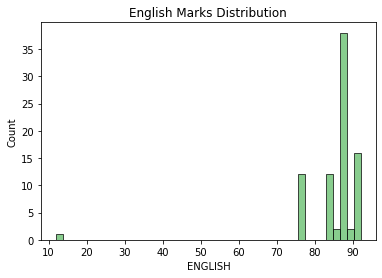

In [13]:
# Visualize data distributions
colors = ['#5DA5DA', '#FAA43A', '#60BD68']

sns.histplot(data=df, x='MATHS', color=colors[0])
plt.title('Maths Marks Distribution')
plt.show()

sns.histplot(data=df, x='SCIENCE', color=colors[1])
plt.title('Science Marks Distribution')
plt.show()

sns.histplot(data=df, x='ENGLISH', color=colors[2])
plt.title('English Marks Distribution')
plt.show()

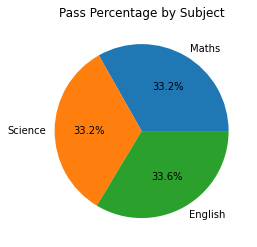

In [14]:
# Compute the number of students who passed each subject
pass_maths = len(df[df['MATHS'] >= 50])
pass_science = len(df[df['SCIENCE'] >= 50])
pass_english = len(df[df['ENGLISH'] >= 50])

# Create a list of pass counts
pass_counts = [pass_maths, pass_science, pass_english]

# Create a pie chart
labels = ['Maths', 'Science', 'English']
plt.pie(pass_counts, labels=labels, autopct='%1.1f%%')
plt.title('Pass Percentage by Subject')
plt.show()

In [15]:
# Generate a report using pandas-profiling
profile = ydata_profiling.ProfileReport(df)
profile.to_file(output_file='student_marks_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]